rnd= 880


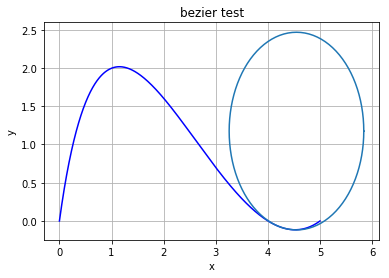

In [54]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

class Circle:
    def __init__(self,x,y,r):
        self.x      = x
        self.y      = y
        self.r      = r
        self.centre = np.array([x,y])
    def generate_points(self,n):
        points = np.zeros((n+1,2))
        for i in range(n+1):
            theta = i * (2*np.pi / n)
            offset = np.array([self.r*math.cos(theta),self.r*math.sin(theta)])
            point = self.centre + offset
            points[i] += point
        return points
    def print_equation(self):
        equation = '(x - {})**2 + (y - {})**2 = {}**2'.format(self.x,self.y,self.r)
        print(equation)

def circle_from_points(A,B,C):
    """creates a circle defined by three points"""
    A = np.array(A)
    B = np.array(B)
    C = np.array(C)
    
    midAB = 0.5*(A+B)
    midBC = 0.5*(B+C)
    
    slopeAB = (B[1]-A[1])/(B[0]-A[0])
    slopeBC = (C[1]-B[1])/(C[0]-B[0])
    
    slopeABperp = -1 / slopeAB
    slopeBCperp = -1 / slopeBC
    
        #y - y1 = m(x - x1)
    #y - midAB[1] = slopeABperp*(x - midAB[0])
    #y - midBC[1] = slopeBCperp*(x - midBC[0])
    
        #solve for x
    #slopeABperp*(x - midAB[0]) + midAB[1] = slopeBCperp*(x - midBC[0]) + midBC[1]
    #slopeABperp*(x - midAB[0]) - slopeBCperp*(x - midBC[0]) = midBC[1] - midAB[1]
    #slopeABperp*x - slopeBCperp*x = midBC[1] - midAB[1] + slopeABperp*midAB[0] - slopeBCperp*midBC[0]
    #x*(slopeABperp - slopeBCperp) = slopeABperp*midAB[0] - midAB[1] - slopeBCperp*midBC[0] + midBC[1]
    
    x = (slopeABperp*midAB[0] - midAB[1] - slopeBCperp*midBC[0] + midBC[1])/(slopeABperp - slopeBCperp)
    y = slopeABperp*(x - midAB[0]) + midAB[1]
    
    centre = np.array([x,y])
    
    r = np.linalg.norm(centre-A)
    
    return Circle(x,y,r)

def bezier_quadratic(p0, p1, p2, t):
    """returns a position on bezier curve defined by 3 points at t"""
    return p1 + (1-t)**2*(p0-p1) + t**2*(p2-p1)

def bezier_cubic(p0, p1, p2, p3, t):
    """returns a position on bezier curve defined by 4 points at t"""
    return (1-t)**3*p0 + 3*(1-t)**2*t*p1 + 3*(1-t)*t**2*p2 + t**3*p3

#Bezier calculation
n = 1000
p0 = np.array([0,0])
p1 = np.array([1,5])
p2 = np.array([3,-1])
p3 = np.array([5,0])
t = np.linspace(0.0,1.0,n)
s = np.zeros((n,2))
for i in range(len(t)):
    s[i] += (bezier_cubic(p0,p1,p2,p3,t[i]))
    
#Circle calculation
rnd = random.randint(0,n)
print('rnd=',rnd)
circle = circle_from_points(s[rnd-10],s[rnd],s[rnd+10])
points = circle.generate_points(100)

#Plotting
plt.subplots()
plt.plot(s[:,0], s[:,1], 'b-', label='Bezier')
plt.plot(points[:,0], points[:,1], label='Circle')
plt.title('bezier test')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()